# Between Concrete & Countryside - The Urban-Rural Divide in Environmental Views

## General Information

This project examines urban-rural differences in environmental attitudes and behaviours across Europe.

**Authors:** Alex Duni, Azizbek Ussenov, Anna Heckhausen

**Date:** 15 December 2024

**Data:**
In this project, we use data from the ESS and from the WorldBank. You can access this data under the following links.

[ESS data (Round 8)](https://ess.sikt.no/en/datafile/ffc43f48-e15a-4a1c-8813-47eda377c355/93?tab=0)

[WorldBank data](https://ess.sikt.no/en/datafile/ffc43f48-e15a-4a1c-8813-47eda377c355/93?tab=0): 2016, Indicator: Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative); selected countries from ESS without Israel and Russia



## Explanations (internal use - remove before submission):

**comments that start with 'To-Do'** are things to do. Such comments should be removed before we submit anything.

**comments that start with 'Question'** are questions we need to solve. Such comments should be removed before we submit anything.

comments that do not start with 'To-do' or 'Question' are explanations of the code below (which

## Data Preparation

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as stats

In [2]:
survey_df = pd.read_csv('/Users/azizbek.ussenov/Desktop/CEU/Applied Statistics/ESG-Analysis/Data/ESS8e02_3.csv')
survey_df.head()

/var/folders/xv/bb6vqsv155qb6_tyzdzfys8c0000gn/T/ipykernel_68141/4036808227.py:1: DtypeWarning: Columns (168) have mixed types. Specify dtype option on import or set low_memory=False.
  survey_df = pd.read_csv('/Users/azizbek.ussenov/Desktop/CEU/Applied Statistics/ESG-Analysis/Data/ESS8e02_3.csv')


,name,essround,edition,proddate,idno,cntry,dweight,pspwght,pweight,anweight,...,inwmms,inwyys,inwshh,inwsmm,inwdde,inwmme,inwyye,inwehh,inwemm,inwtm
0,ESS8e02_3,8,2.3,23.11.2023,1,AT,0.611677,1.178495,0.370393,0.436506,...,12,2016,7,37,5,12,2016,8,33,50.0
1,ESS8e02_3,8,2.3,23.11.2023,2,AT,1.223354,0.899471,0.370393,0.333158,...,11,2016,9,39,25,11,2016,11,10,86.0
2,ESS8e02_3,8,2.3,23.11.2023,4,AT,0.389058,0.315753,0.370393,0.116953,...,11,2016,17,17,22,11,2016,18,0,38.0
3,ESS8e02_3,8,2.3,23.11.2023,6,AT,0.642594,0.472467,0.370393,0.174999,...,10,2016,19,9,11,10,2016,19,59,46.0
4,ESS8e02_3,8,2.3,23.11.2023,10,AT,3.432402,2.246706,0.370393,0.832164,...,12,2016,10,31,1,12,2016,11,49,70.0


In [3]:
survey_df.describe()

,essround,edition,idno,dweight,pspwght,pweight,anweight,nwspol,netusoft,netustm,...,inwmms,inwyys,inwshh,inwsmm,inwdde,inwmme,inwyye,inwehh,inwemm,inwtm
count,44387.0,4.438700e+04,4.438700e+04,44387.000000,44387.000000,44387.000000,44387.000000,44387.000000,44387.000000,44387.000000,...,44387.000000,44387.000000,44387.000000,44387.000000,44387.000000,44387.000000,44387.000000,44387.000000,44387.000000,43250.000000
mean,8.0,2.300000e+00,3.154578e+07,1.000000,1.000000,1.174817,1.174817,189.470701,3.862077,2299.033343,...,8.177214,2020.365512,14.334310,25.562890,15.853741,8.152883,2018.027553,16.113412,29.491675,65.225272
std,0.0,1.811460e-12,1.155417e+08,0.390219,0.548561,1.301596,1.923216,962.889443,1.594919,3063.010782,...,4.329691,177.674958,3.947528,18.514428,8.731993,4.041277,113.658562,8.608613,18.768750,26.680245
min,8.0,2.300000e+00,1.000000e+00,0.036070,0.018145,0.030226,0.007141,0.000000,1.000000,0.000000,...,1.000000,2016.000000,0.000000,0.000000,1.000000,1.000000,2016.000000,0.000000,0.000000,0.000000
25%,8.0,2.300000e+00,1.208000e+03,0.915591,0.694870,0.239750,0.187990,30.000000,3.000000,120.000000,...,5.000000,2016.000000,12.000000,9.000000,8.000000,5.000000,2016.000000,13.000000,14.000000,50.000000
50%,8.0,2.300000e+00,2.589000e+03,1.000000,0.920021,0.520820,0.475879,60.000000,5.000000,240.000000,...,10.000000,2016.000000,14.000000,24.000000,16.000000,10.000000,2016.000000,16.000000,29.000000,60.000000
75%,8.0,2.300000e+00,1.105750e+04,1.044025,1.169933,2.013008,1.739004,90.000000,5.000000,6666.000000,...,11.000000,2017.000000,17.000000,41.000000,23.000000,11.000000,2017.000000,18.000000,45.000000,75.000000
max,8.0,2.300000e+00,5.516031e+08,6.206992,4.002002,4.985758,19.945196,9999.000000,9.000000,9999.000000,...,99.000000,9999.000000,99.000000,99.000000,99.000000,99.000000,9999.000000,99.000000,99.000000,1083.000000


In [4]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44387 entries, 0 to 44386
Columns: 535 entries, name to inwtm
dtypes: float64(227), int64(298), object(10)
memory usage: 181.2+ MB


Selecting only columns according to the research interest

In [5]:
data_needed = survey_df[['idno', 'cntry', 'domicil', 'wrclmch', 'clmthgt2', 'ccgdbd', 'eneffap', 'rdcenr', 'ccrdprs', 'eisced', 'lrscale']]
data_needed.head()

,idno,cntry,domicil,wrclmch,clmthgt2,ccgdbd,eneffap,rdcenr,ccrdprs,eisced,lrscale
0,1,AT,1,4,4,10,8,4,8,7,0
1,2,AT,1,4,4,2,10,5,7,4,1
2,4,AT,4,4,4,2,9,4,8,3,5
3,6,AT,1,3,3,7,10,4,6,3,0
4,10,AT,3,4,2,5,10,6,6,3,5


In [6]:
data_needed.isna().sum()

idno        0
cntry       0
domicil     0
wrclmch     0
clmthgt2    0
ccgdbd      0
eneffap     0
rdcenr      0
ccrdprs     0
eisced      0
lrscale     0
dtype: int64

In [7]:
data_needed['cntry'].unique()

array(['AT', 'BE', 'CH', 'CZ', 'DE', 'EE', 'ES', 'FI', 'FR', 'GB', 'HU',
       'IE', 'IL', 'IS', 'IT', 'LT', 'NL', 'NO', 'PL', 'PT', 'RU', 'SE',
       'SI'], dtype=object)

Remove countries that are not part of Europe (Russian Federation, Israel) and Ensure no 'RU' or 'IS'

In [8]:
data_needed = data_needed[~data_needed['cntry'].isin(['RU', 'IL'])]

if data_needed['cntry'].isin(['RU', 'IL']).any():
    print("Still: 'RU' or 'IL'")
else:
    print("No: 'RU' or 'IL'")

No: 'RU' or 'IL'


##### Recoding `domicil` into two category 'City' and 'Rural'

In [9]:
def classify_area(value):
    if value in [1, 2, 3]:
        return 'City'
    elif value in [4, 5]:
        return 'Rural'
    else:
        return None

data_needed['area_type'] = data_needed['domicil'].apply(classify_area)

In [10]:
data_needed['area_type'].value_counts()

area_type
City     24244
Rural    15114
Name: count, dtype: int64

In [11]:
data_needed.drop(columns=['domicil'])

,idno,cntry,wrclmch,clmthgt2,ccgdbd,eneffap,rdcenr,ccrdprs,eisced,lrscale,area_type
0,1,AT,4,4,10,8,4,8,7,0,City
1,2,AT,4,4,2,10,5,7,4,1,City
2,4,AT,4,4,2,9,4,8,3,5,Rural
3,6,AT,3,3,7,10,4,6,3,0,City
4,10,AT,4,2,5,10,6,6,3,5,City
...,...,...,...,...,...,...,...,...,...,...,...
44382,1303,SI,3,3,5,10,5,5,4,1,Rural
44383,1304,SI,3,3,5,5,3,4,6,5,City
44384,1305,SI,4,4,1,10,6,7,6,0,City
44385,1306,SI,3,4,4,8,4,7,7,4,City


In [12]:
data_needed['wrclmch'].mean()

3.1359137055837563

In [13]:
stats

<module 'scipy' from '/Users/azizbek.ussenov/anaconda3/lib/python3.11/site-packages/scipy/__init__.py'>

In [14]:
data_needed = data_needed[~data_needed['wrclmch'].isin([6, 7, 8, 9])]
data_needed = data_needed[~data_needed['clmthgt2'].isin([6, 7, 8, 9])]
data_needed = data_needed[~data_needed['ccgdbd'].isin([66,77, 88, 99])]

In [15]:
data_needed = data_needed[~data_needed['eneffap'].isin([77, 88, 99])]
data_needed = data_needed[~data_needed['rdcenr'].isin([77, 88, 99])]
data_needed = data_needed[~data_needed['ccrdprs'].isin([66, 77, 88, 99])]

In [16]:
def recode_rdcenr(value):
    if value == 55:
        return 1
    else:
        return value

data_needed['rdcenr_recode'] = data_needed['rdcenr'].apply(recode_rdcenr)

In [17]:
data_needed[['wrclmch', 'clmthgt2', 'ccgdbd', 'eneffap', 'rdcenr_recode', 'ccrdprs']].describe()

,wrclmch,clmthgt2,ccgdbd,eneffap,rdcenr_recode,ccrdprs
count,36212.000000,36212.000000,36212.000000,36212.000000,36212.000000,36212.000000
mean,3.079283,3.133823,3.214874,7.882636,4.220286,5.793052
std,0.903560,1.036245,2.173504,2.183127,1.162833,2.612127
min,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,3.000000,3.000000,2.000000,7.000000,3.000000,4.000000
50%,3.000000,3.000000,3.000000,8.000000,4.000000,6.000000
75%,4.000000,4.000000,5.000000,10.000000,5.000000,8.000000
max,5.000000,5.000000,10.000000,10.000000,6.000000,10.000000


/Users/azizbek.ussenov/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/azizbek.ussenov/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/azizbek.ussenov/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/azizbek.ussenov/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and wil

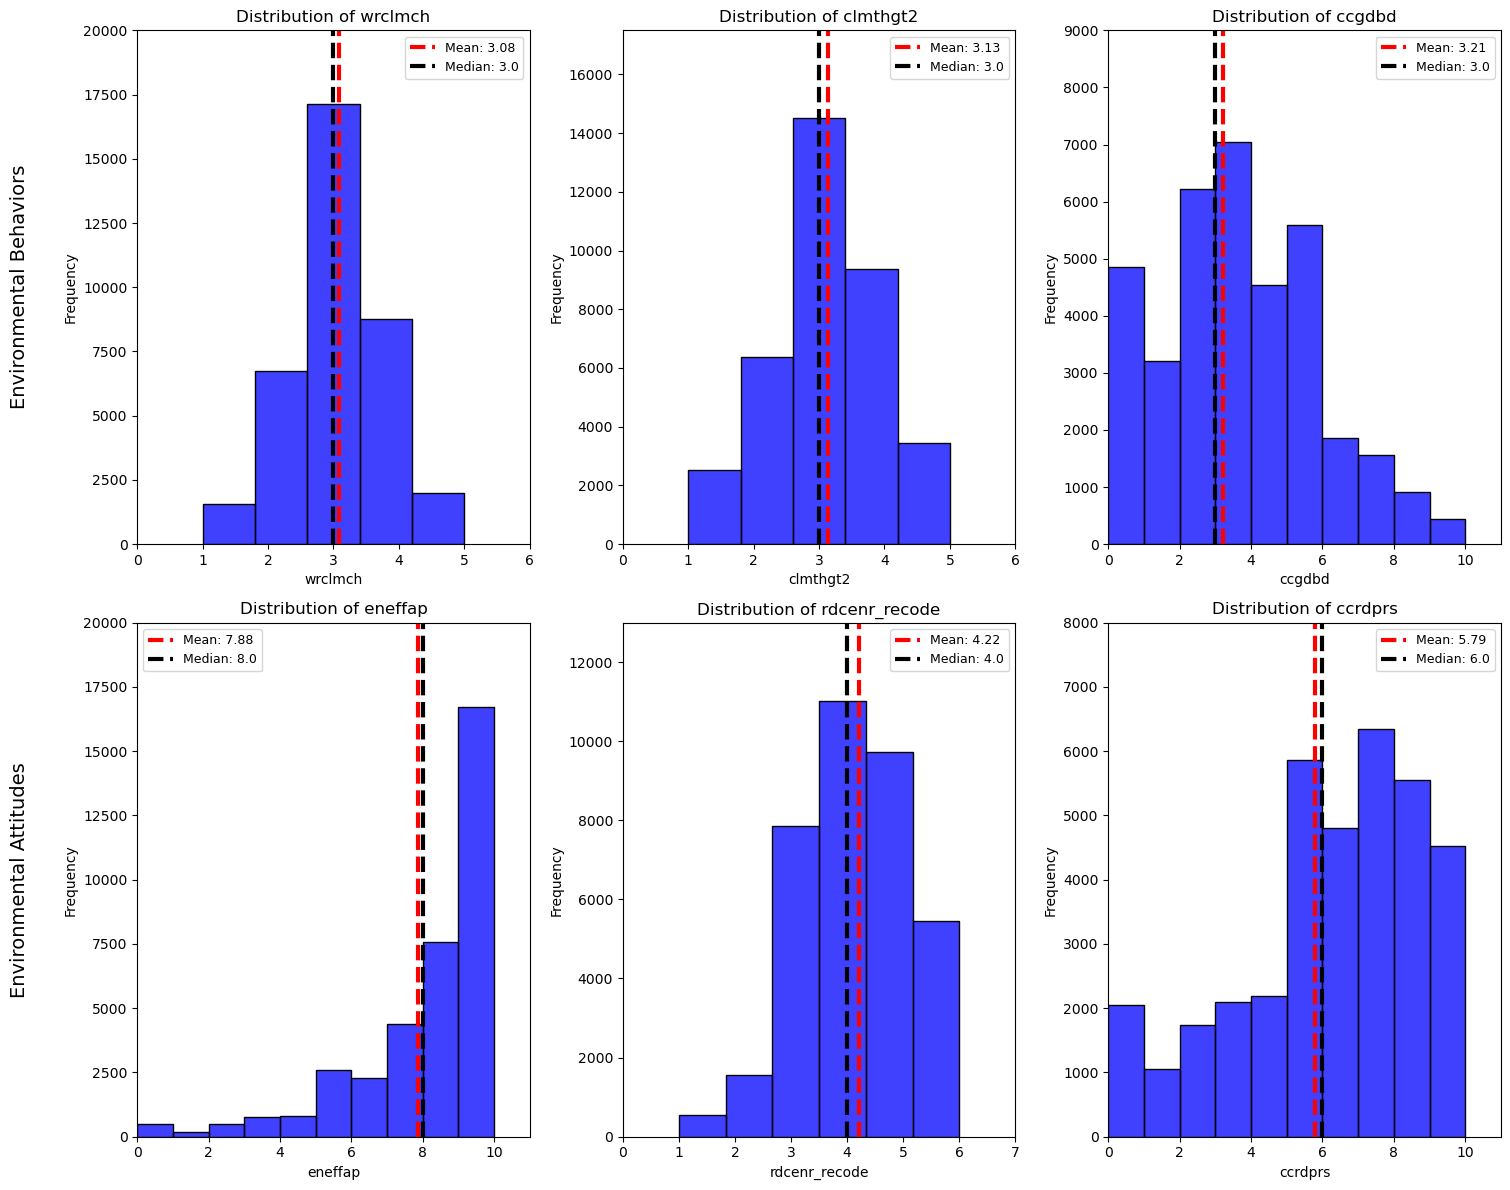

In [18]:
columns = ['wrclmch', 'clmthgt2', 'ccgdbd', 'eneffap', 'rdcenr_recode', 'ccrdprs']
stats = {col: (data_needed[col].mean(), data_needed[col].median()) for col in columns}

# bin sizes, xlim, and ylim for each variable
plot_settings = {
    'wrclmch': {'bins': 5, 'xlim': (0, 6), 'ylim': (0, 20000)},
    'clmthgt2': {'bins': 5, 'xlim': (0, 6), 'ylim': (0, 17500)},
    'ccgdbd': {'bins': 10, 'xlim': (0, 11), 'ylim': (0, 9000)},
    'eneffap': {'bins': 10, 'xlim': (0, 11), 'ylim': (0, 20000)},
    'rdcenr_recode': {'bins': 6, 'xlim': (0, 7), 'ylim': (0, 13000)},
    'ccrdprs': {'bins': 10, 'xlim': (0, 11), 'ylim': (0, 8000)}
}

fig, axes = plt.subplots(2, 3, figsize=(15, 12))

for i, col in enumerate(columns):
    row, col_idx = divmod(i, 3)  # Determine row and column index
    settings = plot_settings[col]
    
    sns.histplot(data=data_needed, x=col, bins=settings['bins'], kde=False, ax=axes[row, col_idx], color='blue')
    axes[row, col_idx].set_title(f'Distribution of {col}', fontsize=12)
    axes[row, col_idx].set_xlabel(col, fontsize=10)
    axes[row, col_idx].set_ylabel('Frequency', fontsize=10)
    axes[row, col_idx].set_xlim(settings['xlim'])
    axes[row, col_idx].set_ylim(settings['ylim'])
    
    # mean and median lines
    mean, median = stats[col]
    axes[row, col_idx].axvline(mean, color='red', linestyle='dashed', linewidth=3, label=f'Mean: {mean:.2f}')
    axes[row, col_idx].axvline(median, color='black', linestyle='dashed', linewidth=3, label=f'Median: {median}')
    axes[row, col_idx].legend(fontsize=9)

# row titles
axes[0, 0].annotate('Environmental Behaviors', xy=(0, 0.5), xytext=(-0.3, 0.5),
                    textcoords='axes fraction', fontsize=14, ha='center', va='center', rotation=90)
axes[1, 0].annotate('Environmental Attitudes', xy=(0, 0.5), xytext=(-0.3, 0.5),
                    textcoords='axes fraction', fontsize=14, ha='center', va='center', rotation=90)

# spacing between rows
fig.subplots_adjust(hspace=0.5, wspace=0.3)

plt.tight_layout()


In [19]:
area_summary = data_needed.groupby(['cntry', 'area_type']).size().unstack(fill_value=0)

# Calculate percentages
area_summary['Total'] = area_summary.sum(axis=1)
area_summary['City_Percentage'] = (area_summary['City'] / area_summary['Total']) * 100
area_summary['Rural_Percentage'] = (area_summary['Rural'] / area_summary['Total']) * 100

# Rename columns for clarity
area_summary.rename(columns={'City': 'City_Absolute', 'Rural': 'Rural_Absolute'}, inplace=True)

In [20]:
area_summary

area_type,City_Absolute,Rural_Absolute,Total,City_Percentage,Rural_Percentage
cntry,,,,,
AT,970,858,1828,53.063457,46.936543
BE,848,894,1742,48.679679,51.320321
CH,622,826,1448,42.955801,57.044199
CZ,1364,633,1997,68.302454,31.697546
DE,1848,921,2769,66.738895,33.261105
EE,1342,531,1873,71.649760,28.350240
ES,917,774,1691,54.228267,45.771733
FI,1182,683,1865,63.378016,36.621984
FR,1275,726,2001,63.718141,36.281859


Data from World Bank about education

In [21]:
world_bank_df = pd.read_csv('/Users/azizbek.ussenov/Desktop/CEU/Applied Statistics/ESG-Analysis/Data/01d4cc76-d950-4515-a40d-b85330acb7b9_Data.csv')
world_bank_df

,Country Name,Country Code,Series Name,Series Code,2016 [YR2016]
0,Austria,AUT,"Educational attainment, at least completed low...",SE.SEC.CUAT.LO.ZS,98.968643
1,Belgium,BEL,"Educational attainment, at least completed low...",SE.SEC.CUAT.LO.ZS,84.790001
2,Czechia,CZE,"Educational attainment, at least completed low...",SE.SEC.CUAT.LO.ZS,99.800003
3,Estonia,EST,"Educational attainment, at least completed low...",SE.SEC.CUAT.LO.ZS,99.114182
4,Finland,FIN,"Educational attainment, at least completed low...",SE.SEC.CUAT.LO.ZS,85.521523
5,France,FRA,"Educational attainment, at least completed low...",SE.SEC.CUAT.LO.ZS,83.690002
6,Germany,DEU,"Educational attainment, at least completed low...",SE.SEC.CUAT.LO.ZS,96.510002
7,Hungary,HUN,"Educational attainment, at least completed low...",SE.SEC.CUAT.LO.ZS,97.180000
8,Iceland,ISL,"Educational attainment, at least completed low...",SE.SEC.CUAT.LO.ZS,99.538902
9,Ireland,IRL,"Educational attainment, at least completed low...",SE.SEC.CUAT.LO.ZS,86.810600


In [22]:
# Setting '2021 [YR2021]' as a variable to call it more efficiently
year = '2016 [YR2016]'

In [23]:
set(world_bank_df[year])

{54.189998626709,
 75.8000030517578,
 80.1383743286133,
 83.6900024414062,
 84.7900009155273,
 85.3300018310547,
 85.5215225219727,
 86.8106002807617,
 nan,
 89.7099990844727,
 90.5400009155273,
 nan,
 95.1800003051758,
 96.5100021362305,
 96.8899993896484,
 97.1800003051758,
 97.620002746582,
 97.7616348266602,
 98.9686431884766,
 99.1141815185547,
 99.2300033569336,
 99.5389022827148,
 99.8000030517578,
 nan,
 nan,
 nan}

In [24]:
world_bank_df.replace('..', np.nan, inplace=True) # replace '..' for nan values
world_bank_df = world_bank_df[~world_bank_df[year].isna()] # remove all nan values

In [25]:
world_bank_df['Country Code'].unique()

array(['AUT', 'BEL', 'CZE', 'EST', 'FIN', 'FRA', 'DEU', 'HUN', 'ISL',
       'IRL', 'ITA', 'LTU', 'NLD', 'NOR', 'POL', 'PRT', 'SVN', 'ESP',
       'SWE', 'CHE', 'GBR'], dtype=object)

In [26]:
three_to_two = {
    'AUT': 'AT', 
    'BEL': 'BE', 
    'CZE': 'CZ', 
    'EST': 'EE', 
    'FIN': 'FI',
    'FRA': 'FR', 
    'DEU': 'DE', 
    'HUN': 'HU', 
    'ISL': 'IS', 
    'IRL': 'IE',
    'ITA': 'IT', 
    'LTU': 'LT', 
    'NLD': 'NL', 
    'NOR': 'NO', 
    'POL': 'PL',
    'PRT': 'PT', 
    'SVN': 'SI', 
    'ESP': 'ES', 
    'SWE': 'SE', 
    'CHE': 'CH',
    'GBR': 'GB'
}

world_bank_df['Country Code'] = world_bank_df['Country Code'].map(three_to_two)
world_bank_df


/var/folders/xv/bb6vqsv155qb6_tyzdzfys8c0000gn/T/ipykernel_68141/3257060602.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  world_bank_df['Country Code'] = world_bank_df['Country Code'].map(three_to_two)


,Country Name,Country Code,Series Name,Series Code,2016 [YR2016]
0,Austria,AT,"Educational attainment, at least completed low...",SE.SEC.CUAT.LO.ZS,98.968643
1,Belgium,BE,"Educational attainment, at least completed low...",SE.SEC.CUAT.LO.ZS,84.790001
2,Czechia,CZ,"Educational attainment, at least completed low...",SE.SEC.CUAT.LO.ZS,99.800003
3,Estonia,EE,"Educational attainment, at least completed low...",SE.SEC.CUAT.LO.ZS,99.114182
4,Finland,FI,"Educational attainment, at least completed low...",SE.SEC.CUAT.LO.ZS,85.521523
5,France,FR,"Educational attainment, at least completed low...",SE.SEC.CUAT.LO.ZS,83.690002
6,Germany,DE,"Educational attainment, at least completed low...",SE.SEC.CUAT.LO.ZS,96.510002
7,Hungary,HU,"Educational attainment, at least completed low...",SE.SEC.CUAT.LO.ZS,97.180000
8,Iceland,IS,"Educational attainment, at least completed low...",SE.SEC.CUAT.LO.ZS,99.538902
9,Ireland,IE,"Educational attainment, at least completed low...",SE.SEC.CUAT.LO.ZS,86.810600


Pivot the dataframe to have a proper dataframe

In [27]:
world_bank_df = world_bank_df.pivot(columns='Series Name', index='Country Code', values=year).reset_index()
world_bank_df.columns.name = None
world_bank_df

,Country Code,"Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)"
0,AT,98.968643
1,BE,84.790001
2,CH,96.889999
3,CZ,99.800003
4,DE,96.510002
5,EE,99.114182
6,ES,75.800003
7,FI,85.521523
8,FR,83.690002
9,GB,97.761635


Merging of Survey and World Bank data

In [28]:
data_needed.shape

(36212, 13)

### Environmental attitudes Proprocessing: wrclmch, clmthgt1, ccgdbd

##### Removing NA values

<table>
  <tr>
    <td>
      <b>Table 1: wrclmch</b><br>
      <table>
        <tr><th>Value</th><th>Category</th></tr>
        <tr><td>1</td><td>Not at all worried</td></tr>
        <tr><td>2</td><td>Not very worried</td></tr>
        <tr><td>3</td><td>Somewhat worried</td></tr>
        <tr><td>4</td><td>Very worried</td></tr>
        <tr><td>5</td><td>Extremely worried</td></tr>
        <tr><td>6</td><td>Not applicable*</td></tr>
        <tr><td>7</td><td>Refusal*</td></tr>
        <tr><td>8</td><td>Don't know*</td></tr>
        <tr><td>9</td><td>No answer*</td></tr>
      </table>
      <br>(*) Missing Value
    </td>
    <td>
      <b>Table 2: clmthgt2</b><br>
      <table>
        <tr><th>Value</th><th>Category</th></tr>
        <tr><td>1</td><td>Not at all</td></tr>
        <tr><td>2</td><td>Very little</td></tr>
        <tr><td>3</td><td>Some</td></tr>
        <tr><td>4</td><td>A lot</td></tr>
        <tr><td>5</td><td>A great deal</td></tr>
        <tr><td>6</td><td>Not applicable*</td></tr>
        <tr><td>7</td><td>Refusal*</td></tr>
        <tr><td>8</td><td>Don't know*</td></tr>
        <tr><td>9</td><td>No answer*</td></tr>
      </table>
      <br>(*) Missing Value
    </td>
    <td>
      <b>Table 3: ccgdbd</b><br>
      <table>
        <tr><th>Value</th><th>Category</th></tr>
        <tr><td>0</td><td>Extremely bad</td></tr>
        <tr><td>1</td><td>1</td></tr>
        <tr><td>2</td><td>2</td></tr>
        <tr><td>3</td><td>3</td></tr>
        <tr><td>4</td><td>4</td></tr>
        <tr><td>5</td><td>5</td></tr>
        <tr><td>6</td><td>6</td></tr>
        <tr><td>7</td><td>7</td></tr>
        <tr><td>8</td><td>8</td></tr>
        <tr><td>9</td><td>9</td></tr>
        <tr><td>10</td><td>Extremely good</td></tr>
        <tr><td>66</td><td>Not applicable*</td></tr>
        <tr><td>77</td><td>Refusal*</td></tr>
        <tr><td>88</td><td>Don't know*</td></tr>
        <tr><td>99</td><td>No answer*</td></tr>
      </table>
      <br>(*) Missing Value
    </td>
  </tr>
</table>


In [29]:
data_needed = data_needed[~data_needed['wrclmch'].isin([6, 7, 8, 9])]
data_needed = data_needed[~data_needed['clmthgt2'].isin([6, 7, 8, 9])]
data_needed = data_needed[~data_needed['ccgdbd'].isin([66,77, 88, 99])]

In [30]:
data_needed.shape

(36212, 13)

### Environmental behaviours Proprocessing: wrclmch, clmthgt1, ccgdbd

##### Removing NA values

<table>
  <tr>
    <td>
      <b>Table 1: eneffap</b><br>
      <table>
        <tr><th>Value</th><th>Category</th></tr>
        <tr><td>0</td><td>Not at all likely</td></tr>
        <tr><td>1</td><td>1</td></tr>
        <tr><td>2</td><td>2</td></tr>
        <tr><td>3</td><td>3</td></tr>
        <tr><td>4</td><td>4</td></tr>
        <tr><td>5</td><td>5</td></tr>
        <tr><td>6</td><td>6</td></tr>
        <tr><td>7</td><td>7</td></tr>
        <tr><td>8</td><td>8</td></tr>
        <tr><td>9</td><td>9</td></tr>
        <tr><td>10</td><td>Extremely likely</td></tr>
        <tr><td>77</td><td>Refusal*</td></tr>
        <tr><td>88</td><td>Don't know*</td></tr>
        <tr><td>99</td><td>No answer*</td></tr>
      </table>
    </td>
    <td>
      <b>Table 2: rdcenr</b><br>
      <table>
        <tr><th>Value</th><th>Category</th></tr>
        <tr><td>1</td><td>Never</td></tr>
        <tr><td>2</td><td>Hardly ever</td></tr>
        <tr><td>3</td><td>Sometimes</td></tr>
        <tr><td>4</td><td>Often</td></tr>
        <tr><td>5</td><td>Very often</td></tr>
        <tr><td>6</td><td>Always</td></tr>
        <tr><td>55</td><td>Cannot reduce energy use</td></tr>
        <tr><td>77</td><td>Refusal*</td></tr>
        <tr><td>88</td><td>Don't know*</td></tr>
        <tr><td>99</td><td>No answer*</td></tr>
      </table>
    </td>
    <td>
      <b>Table 3: ccrdprs</b><br>
      <table>
        <tr><th>Value</th><th>Category</th></tr>
        <tr><td>0</td><td>Not at all</td></tr>
        <tr><td>1</td><td>1</td></tr>
        <tr><td>2</td><td>2</td></tr>
        <tr><td>3</td><td>3</td></tr>
        <tr><td>4</td><td>4</td></tr>
        <tr><td>5</td><td>5</td></tr>
        <tr><td>6</td><td>6</td></tr>
        <tr><td>7</td><td>7</td></tr>
        <tr><td>8</td><td>8</td></tr>
        <tr><td>9</td><td>9</td></tr>
        <tr><td>10</td><td>A great deal</td></tr>
        <tr><td>66</td><td>Not applicable*</td></tr>
        <tr><td>77</td><td>Refusal*</td></tr>
        <tr><td>88</td><td>Don't know*</td></tr>
        <tr><td>99</td><td>No answer*</td></tr>
      </table>
    </td>
  </tr>
</table>


In [31]:
data_needed = data_needed[~data_needed['eneffap'].isin([77, 88, 99])]
data_needed = data_needed[~data_needed['rdcenr'].isin([77, 88, 99])]
data_needed = data_needed[~data_needed['ccrdprs'].isin([66, 77, 88, 99])]

In [32]:
data_needed.shape

(36212, 13)

##### Recoding `ccgdbd` to a scale of 1-5

In [33]:
def recode_ccgdbd(value):
    if value <= 2:       
        return 1
    elif value <= 4:     
        return 2
    elif value <= 6:     
        return 3
    elif value <= 8:     
        return 4
    elif value <= 10:    
        return 5
    else:
        return None 

data_needed['ccgdbd_recode'] = data_needed['ccgdbd'].apply(recode_ccgdbd)

##### Recoding 55 to 1 to have a common scale

In [34]:
def recode_rdcenr(value):
    if value == 55:
        return 1
    else:
        return value

data_needed['rdcenr_recode'] = data_needed['rdcenr'].apply(recode_rdcenr)

##### Recoding `eneffap` and `ccrdprs` to a scale of 1-6

In [35]:
def recode_to_rdcenr_scale(value):
    if value <= 1:
        return 1
    elif value <= 3:
        return 2
    elif value <= 5:
        return 3
    elif value <= 7:
        return 4
    elif value <= 9:
        return 5
    elif value == 10:
        return 6
    else:
        return None

data_needed['eneffap_recode'] = data_needed['eneffap'].apply(recode_to_rdcenr_scale)
data_needed['ccrdprs_recode'] = data_needed['ccrdprs'].apply(recode_to_rdcenr_scale)

In [36]:
data_needed

,idno,cntry,domicil,wrclmch,clmthgt2,ccgdbd,eneffap,rdcenr,ccrdprs,eisced,lrscale,area_type,rdcenr_recode,ccgdbd_recode,eneffap_recode,ccrdprs_recode
0,1,AT,1,4,4,10,8,4,8,7,0,City,4,5,5,5
1,2,AT,1,4,4,2,10,5,7,4,1,City,5,1,6,4
2,4,AT,4,4,4,2,9,4,8,3,5,Rural,4,1,5,5
3,6,AT,1,3,3,7,10,4,6,3,0,City,4,4,6,4
4,10,AT,3,4,2,5,10,6,6,3,5,City,6,3,6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44382,1303,SI,4,3,3,5,10,5,5,4,1,Rural,5,3,6,3
44383,1304,SI,3,3,3,5,5,3,4,6,5,City,3,3,3,3
44384,1305,SI,3,4,4,1,10,6,7,6,0,City,6,1,6,4
44385,1306,SI,3,3,4,4,8,4,7,7,4,City,4,2,5,4


In [37]:
data_needed = data_needed.drop(columns=['ccgdbd', 'rdcenr', 'eneffap', 'ccrdprs'])

In [38]:
data_needed

,idno,cntry,domicil,wrclmch,clmthgt2,eisced,lrscale,area_type,rdcenr_recode,ccgdbd_recode,eneffap_recode,ccrdprs_recode
0,1,AT,1,4,4,7,0,City,4,5,5,5
1,2,AT,1,4,4,4,1,City,5,1,6,4
2,4,AT,4,4,4,3,5,Rural,4,1,5,5
3,6,AT,1,3,3,3,0,City,4,4,6,4
4,10,AT,3,4,2,3,5,City,6,3,6,4
...,...,...,...,...,...,...,...,...,...,...,...,...
44382,1303,SI,4,3,3,4,1,Rural,5,3,6,3
44383,1304,SI,3,3,3,6,5,City,3,3,3,3
44384,1305,SI,3,4,4,6,0,City,6,1,6,4
44385,1306,SI,3,3,4,7,4,City,4,2,5,4


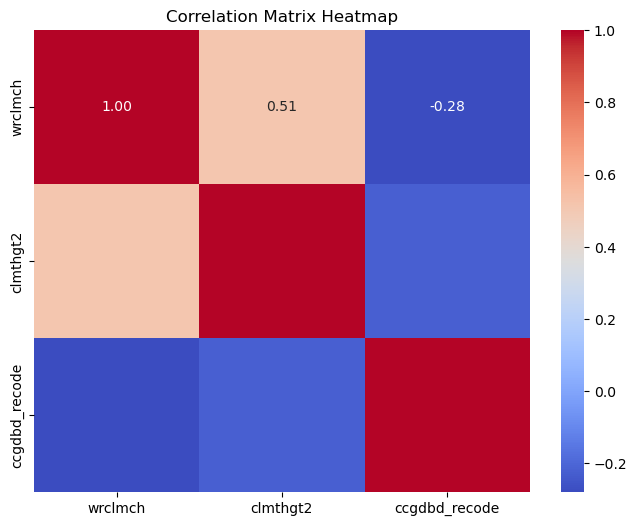

In [39]:
environmental_attitudes = data_needed[['wrclmch', 'clmthgt2', 'ccgdbd_recode']]
correlation_matrix = environmental_attitudes.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

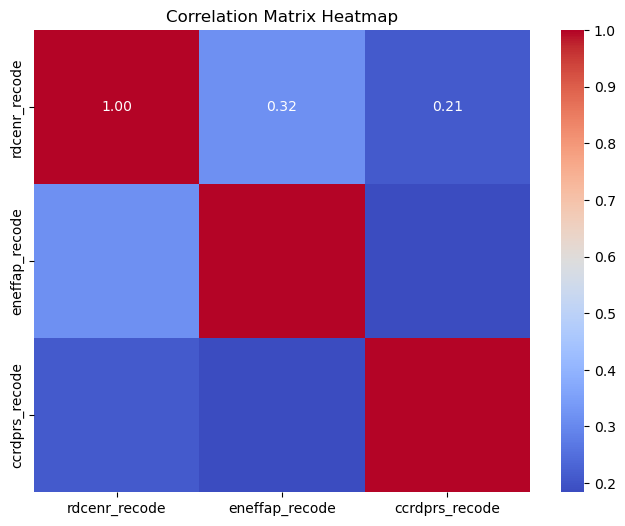

In [40]:
environmental_behaviours = data_needed[['rdcenr_recode', 'eneffap_recode', 'ccrdprs_recode']]
correlation_matrix = environmental_behaviours.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

### Merge the two DataFrames: Survey and World Bank


In [41]:
survey_and_wb = data_needed.merge(world_bank_df, left_on='cntry', right_on='Country Code', how='left')

# Drop the redundant "Country Code" column
survey_and_wb.drop(columns=['Country Code'], inplace=True)

survey_and_wb.head()

,idno,cntry,domicil,wrclmch,clmthgt2,eisced,lrscale,area_type,rdcenr_recode,ccgdbd_recode,eneffap_recode,ccrdprs_recode,"Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)"
0,1,AT,1,4,4,7,0,City,4,5,5,5,98.968643
1,2,AT,1,4,4,4,1,City,5,1,6,4,98.968643
2,4,AT,4,4,4,3,5,Rural,4,1,5,5,98.968643
3,6,AT,1,3,3,3,0,City,4,4,6,4,98.968643
4,10,AT,3,4,2,3,5,City,6,3,6,4,98.968643
